Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gym

Importing discretization code from other notebook

In [2]:
%run discretization.ipynb


Action selection step


In [3]:

def action_selection(Q, state, epsilon, n_actions):

    #Exploration
    if np.random.random() < epsilon:
        return np.random.choice(n_actions)
    
    #Exploitation
    else:
        return np.argmax(Q[state])

Monte carlo function


In [4]:
def monte_carlo_prediction_with_rewards(env, num_episodes, gamma=0.99):
   
    
    V = np.zeros([n_bins, n_bins, n_bins, n_bins])  # State-value function
    returns_sum = np.zeros([n_bins, n_bins, n_bins, n_bins])
    returns_count = np.zeros([n_bins, n_bins, n_bins, n_bins])
    
    rewards_per_episode = []  # To track the total reward per episode
    
    for episode in range(num_episodes):
        episode_data = []
        state, _ = env.reset()
        state = discretize_state(state)
        
        done = False
        total_reward = 0
        
        while not done:
            action = env.action_space.sample()  # Random action (you can use a policy here)
            next_state, reward, done, truncated, _ = env.step(action)
            next_state = discretize_state(next_state)
            episode_data.append((state, action, reward))  # Track episode data
            total_reward += reward  # Track total reward for this episode
            state = next_state
        
        rewards_per_episode.append(total_reward)  # Track the reward for the episode

        # Monte Carlo return: Loop backwards through episode
        G = 0  # Initialize return
        visited_states = set()

        for t in range(len(episode_data) - 1, -1, -1):
            state, action, reward = episode_data[t]
            G = gamma * G + reward  # Compute the return

            if state not in visited_states:
                returns_sum[state] += G
                returns_count[state] += 1
                V[state] = returns_sum[state] / returns_count[state]
                visited_states.add(state)

        if episode % 100 == 0:
            print(f"Episode {episode}/{num_episodes} complete.")
    
    return V, rewards_per_episode







Environment

In [5]:
env = gym.make('CartPole-v0')

c:\Users\Asus\anaconda3\envs\rl\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Hyperparameter

In [6]:
num_episodes = 2000

gamma = 0.95


Final training

In [7]:
V_mc, rewards_mc = monte_carlo_prediction_with_rewards(env, num_episodes, gamma)

Episode 0/2000 complete.
Episode 100/2000 complete.
Episode 200/2000 complete.
Episode 300/2000 complete.
Episode 400/2000 complete.
Episode 500/2000 complete.
Episode 600/2000 complete.
Episode 700/2000 complete.
Episode 800/2000 complete.
Episode 900/2000 complete.
Episode 1000/2000 complete.
Episode 1100/2000 complete.
Episode 1200/2000 complete.
Episode 1300/2000 complete.
Episode 1400/2000 complete.
Episode 1500/2000 complete.
Episode 1600/2000 complete.
Episode 1700/2000 complete.
Episode 1800/2000 complete.
Episode 1900/2000 complete.


Final plot: Avg reward vs Episode

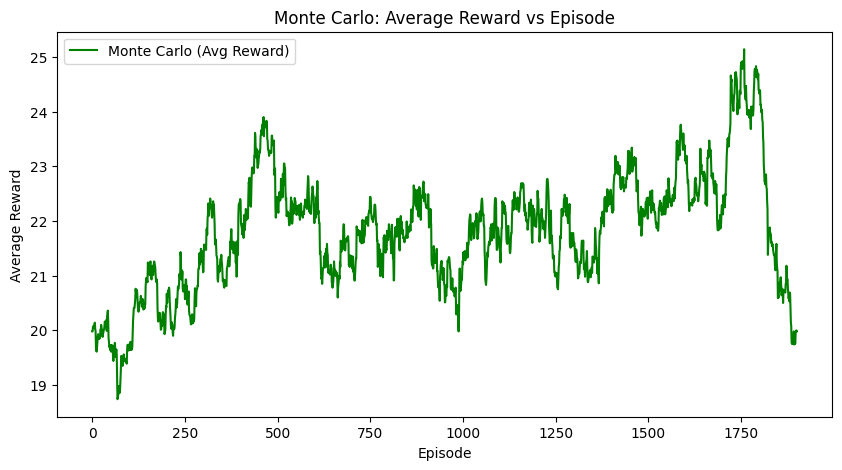

In [13]:
# Plot average return per episode
def plot_average_return_mc(rewards_mc, window_size=100):
    avg_return_mc = np.convolve(rewards_mc, np.ones(window_size)/window_size, mode='valid')
    
    plt.figure(figsize=(10, 5))
    plt.plot(avg_return_mc, label='Monte Carlo (Avg Reward)', color='green')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Monte Carlo: Average Reward vs Episode')
    plt.legend()
    plt.show()

# Call the function to plot average return
plot_average_return_mc(rewards_mc)